# CAT 2 - Bayesian Statistics (DSA 8505)
## Strathmore Institute of Mathematical Sciences
### Master of Science in Data Science & Analytics

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

## Question 1: Bayesian Inference for Facial Recognition System

### Problem Context
A security agency uses facial recognition at an airport where:
- Only 0.5% of travelers are on the watchlist
- True positive rate: 95% (system correctly flags watchlist travelers)
- False positive rate: 3% (system incorrectly flags non-watchlist travelers)

A traveler is flagged. What's the probability they're actually on the watchlist?

### Part (a): Prior Probability

**Definition:** The prior probability represents our belief before observing any data.

Let $W$ = event that traveler is on watchlist

**Prior probability:**
$$P(W) = 0.005 = 0.5\%$$

$$P(W^c) = 1 - P(W) = 0.995 = 99.5\%$$

**Intuition:** Before any screening, we know that only 1 in 200 travelers is on the watchlist.

In [2]:
# Define prior probabilities
P_W = 0.005  # Prior probability of being on watchlist
P_not_W = 1 - P_W  # Prior probability of NOT being on watchlist

print(f"Prior Probability P(W) = {P_W}")
print(f"Prior Probability P(W^c) = {P_not_W}")

Prior Probability P(W) = 0.005
Prior Probability P(W^c) = 0.995


### Part (b): Likelihood Functions

**Definition:** The likelihood represents the probability of observing the data (being flagged) given each hypothesis.

Let $F$ = event that traveler is flagged by the system

**Likelihood given on watchlist (True Positive Rate):**
$$P(F | W) = 0.95$$

This means: If someone IS on the watchlist, there's a 95% chance the system flags them.

**Likelihood given NOT on watchlist (False Positive Rate):**
$$P(F | W^c) = 0.03$$

This means: If someone is NOT on the watchlist, there's only a 3% chance the system incorrectly flags them.

**Intuition:** The system is quite good at detecting watchlist individuals (95% success) and rarely makes mistakes with innocent travelers (only 3% false alarms).

In [3]:
# Define likelihood probabilities
P_F_given_W = 0.95  # True positive rate: P(Flagged | On watchlist)
P_F_given_not_W = 0.03  # False positive rate: P(Flagged | NOT on watchlist)

print(f"Likelihood P(F|W) = {P_F_given_W} (True Positive Rate)")
print(f"Likelihood P(F|W^c) = {P_F_given_not_W} (False Positive Rate)")

Likelihood P(F|W) = 0.95 (True Positive Rate)
Likelihood P(F|W^c) = 0.03 (False Positive Rate)


### Part (c): Marginal Probability

**Definition:** The marginal probability is the total probability of being flagged, regardless of watchlist status.

Using the **Law of Total Probability:**

$$P(F) = P(F | W) \cdot P(W) + P(F | W^c) \cdot P(W^c)$$

**Substituting values:**
$$P(F) = (0.95)(0.005) + (0.03)(0.995)$$
$$P(F) = 0.00475 + 0.02985$$
$$P(F) = 0.0346$$

**Intuition:** About 3.46% of all travelers get flagged. This includes both:
- True positives: Actual watchlist members correctly identified
- False positives: Innocent travelers incorrectly flagged

In [4]:
# Calculate marginal probability using Law of Total Probability
P_F = P_F_given_W * P_W + P_F_given_not_W * P_not_W

print(f"\nMarginal Probability P(F) = {P_F:.6f}")
print(f"Percentage of travelers flagged: {P_F*100:.2f}%")

# Break down the components
true_positive_contribution = P_F_given_W * P_W
false_positive_contribution = P_F_given_not_W * P_not_W

print(f"\nContribution from true positives: {true_positive_contribution:.6f}")
print(f"Contribution from false positives: {false_positive_contribution:.6f}")


Marginal Probability P(F) = 0.034600
Percentage of travelers flagged: 3.46%

Contribution from true positives: 0.004750
Contribution from false positives: 0.029850


### Part (d): Posterior Probability using Bayes' Theorem

**Bayes' Theorem:**
$$P(W | F) = \frac{P(F | W) \cdot P(W)}{P(F)}$$

Where:
- $P(W | F)$ = Posterior probability (what we want to find)
- $P(F | W)$ = Likelihood (0.95)
- $P(W)$ = Prior probability (0.005)
- $P(F)$ = Marginal probability (0.0346)

**Calculation:**
$$P(W | F) = \frac{0.95 \times 0.005}{0.0346}$$

$$P(W | F) = \frac{0.00475}{0.0346}$$

$$P(W | F) \approx 0.1373 = 13.73\%$$

**Intuition:** Even though the system flagged this traveler, there's only a 13.73% chance they're actually on the watchlist! This surprising result occurs because:
1. Watchlist travelers are very rare (0.5%)
2. The large population of non-watchlist travelers (99.5%) generates many false positives
3. Even a small false positive rate (3%) applied to a huge population creates many false alarms

In [5]:
# Calculate posterior probability using Bayes' Theorem
P_W_given_F = (P_F_given_W * P_W) / P_F

print(f"\n{'='*60}")
print(f"POSTERIOR PROBABILITY (Bayes' Theorem)")
print(f"{'='*60}")
print(f"P(W|F) = {P_W_given_F:.6f}")
print(f"Percentage: {P_W_given_F*100:.2f}%")
print(f"\nInterpretation: If a traveler is flagged, there is a")
print(f"{P_W_given_F*100:.2f}% probability they are actually on the watchlist.")


POSTERIOR PROBABILITY (Bayes' Theorem)
P(W|F) = 0.137283
Percentage: 13.73%

Interpretation: If a traveler is flagged, there is a
13.73% probability they are actually on the watchlist.


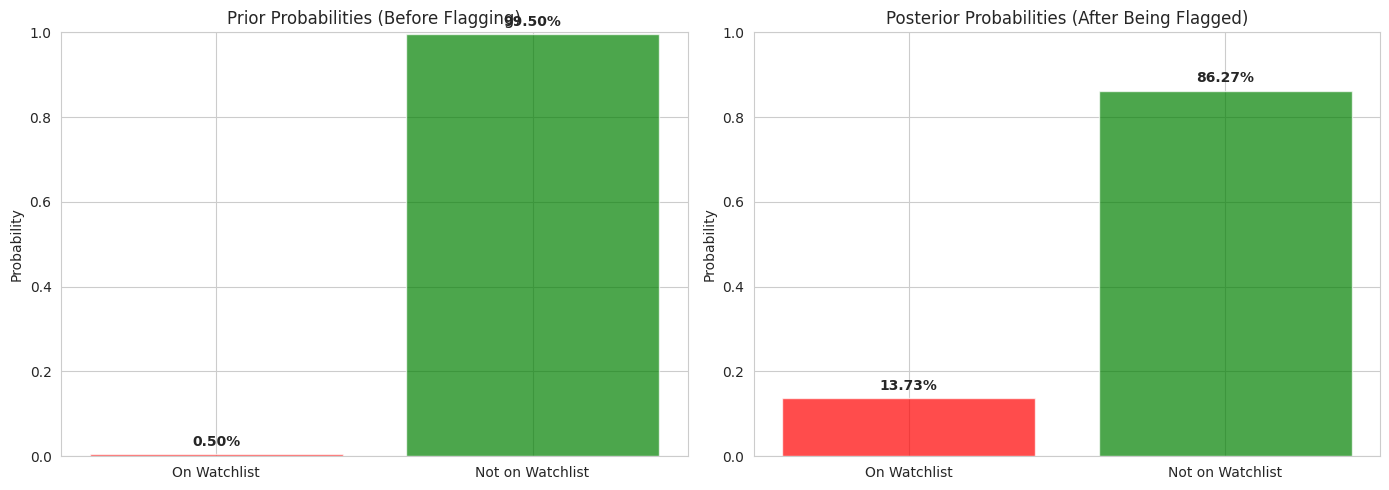

In [6]:
# Visualization: Prior vs Posterior
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Prior probabilities
axes[0].bar(['On Watchlist', 'Not on Watchlist'], [P_W, P_not_W], 
            color=['red', 'green'], alpha=0.7)
axes[0].set_ylabel('Probability')
axes[0].set_title('Prior Probabilities (Before Flagging)')
axes[0].set_ylim([0, 1])
for i, v in enumerate([P_W, P_not_W]):
    axes[0].text(i, v + 0.02, f'{v*100:.2f}%', ha='center', fontweight='bold')

# Posterior probabilities
P_not_W_given_F = 1 - P_W_given_F
axes[1].bar(['On Watchlist', 'Not on Watchlist'], [P_W_given_F, P_not_W_given_F], 
            color=['red', 'green'], alpha=0.7)
axes[1].set_ylabel('Probability')
axes[1].set_title('Posterior Probabilities (After Being Flagged)')
axes[1].set_ylim([0, 1])
for i, v in enumerate([P_W_given_F, P_not_W_given_F]):
    axes[1].text(i, v + 0.02, f'{v*100:.2f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

### Part (e): Policy Interpretation

**Key Finding:** The posterior probability is only 13.73%

**Policy Recommendations:**

1. **DO NOT immediately detain:** With only 13.73% probability, immediate detention would mean:
   - 86.27% of flagged travelers are innocent
   - This would cause significant disruption and potential legal issues
   - High rate of false detentions would erode public trust

2. **APPLY additional screening:** This is the appropriate response because:
   - 13.73% is significantly higher than the base rate of 0.5%
   - The flag provides valuable information (27x increase in probability)
   - Additional screening can further refine the probability
   - Balances security needs with traveler rights

3. **Recommended Actions:**
   - Secondary screening by human officers
   - Manual verification of identity documents
   - Additional biometric checks
   - Cross-reference with other databases

4. **System Improvement Considerations:**
   - Reduce false positive rate (currently 3%)
   - Implement multi-stage verification
   - Use the system as a first filter, not final decision-maker

**Statistical Insight:** This demonstrates the **base rate fallacy** - even with a highly accurate test, rare events lead to many false positives when screening large populations.

In [7]:
# Simulate outcomes for 10,000 travelers
n_travelers = 10000
n_on_watchlist = int(n_travelers * P_W)
n_not_on_watchlist = n_travelers - n_on_watchlist

# True positives: watchlist members correctly flagged
true_positives = int(n_on_watchlist * P_F_given_W)

# False positives: innocent travelers incorrectly flagged
false_positives = int(n_not_on_watchlist * P_F_given_not_W)

# Total flagged
total_flagged = true_positives + false_positives

print(f"\n{'='*60}")
print(f"SIMULATION: {n_travelers:,} Travelers")
print(f"{'='*60}")
print(f"Travelers on watchlist: {n_on_watchlist}")
print(f"Travelers NOT on watchlist: {n_not_on_watchlist:,}")
print(f"\nTrue Positives (correctly flagged): {true_positives}")
print(f"False Positives (incorrectly flagged): {false_positives}")
print(f"Total Flagged: {total_flagged}")
print(f"\nOf those flagged, {true_positives}/{total_flagged} = {true_positives/total_flagged*100:.2f}% are actually on watchlist")
print(f"\nThis confirms our Bayesian calculation of {P_W_given_F*100:.2f}%")


SIMULATION: 10,000 Travelers
Travelers on watchlist: 50
Travelers NOT on watchlist: 9,950

True Positives (correctly flagged): 47
False Positives (incorrectly flagged): 298
Total Flagged: 345

Of those flagged, 47/345 = 13.62% are actually on watchlist

This confirms our Bayesian calculation of 13.73%


## Question 2: Bayesian Regression and Model Comparison

### Problem Context
We want to model monthly electricity consumption (y in kWh) using average monthly temperature (x in °C).

**Two competing models:**
- **Model 1 (M₁):** Linear effect: $y = \beta_0 + \beta_1 x + \varepsilon$
- **Model 2 (M₂):** Quadratic effect: $y = \beta_0 + \beta_1 x + \beta_2 x^2 + \varepsilon$

where $\varepsilon \sim N(0, \sigma^2)$

Observed Data:
   Temperature (°C)  Electricity (kWh)
0                10                220
1                15                240
2                20                280
3                25                350
4                30                460


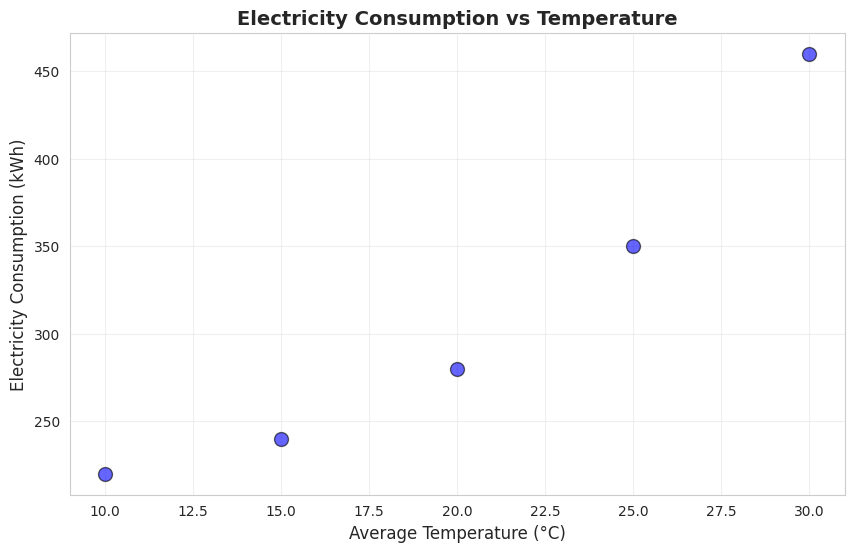

In [8]:
# Load the data
temperature = np.array([10, 15, 20, 25, 30])
electricity = np.array([220, 240, 280, 350, 460])

# Create DataFrame for better visualization
data = pd.DataFrame({
    'Temperature (°C)': temperature,
    'Electricity (kWh)': electricity
})

print("Observed Data:")
print(data)

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(temperature, electricity, s=100, color='blue', alpha=0.6, edgecolors='black')
plt.xlabel('Average Temperature (°C)', fontsize=12)
plt.ylabel('Electricity Consumption (kWh)', fontsize=12)
plt.title('Electricity Consumption vs Temperature', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

### Part (a): OLS Estimation for Model M₁

**Ordinary Least Squares (OLS) Method:**

For the linear model: $y = \beta_0 + \beta_1 x + \varepsilon$

**OLS Formulas:**

$$\hat{\beta}_1 = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})^2} = \frac{Cov(x,y)}{Var(x)}$$

$$\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}$$

Where:
- $\bar{x}$ = mean of temperature
- $\bar{y}$ = mean of electricity consumption

**Intuition:** OLS finds the line that minimizes the sum of squared residuals (vertical distances from points to the line).

In [9]:
# Calculate means
x_bar = np.mean(temperature)
y_bar = np.mean(electricity)

print(f"Mean temperature: {x_bar}°C")
print(f"Mean electricity: {y_bar} kWh")

# Calculate beta_1 (slope)
numerator = np.sum((temperature - x_bar) * (electricity - y_bar))
denominator = np.sum((temperature - x_bar)**2)
beta_1_hat = numerator / denominator

# Calculate beta_0 (intercept)
beta_0_hat = y_bar - beta_1_hat * x_bar

print(f"\n{'='*60}")
print(f"OLS ESTIMATES FOR MODEL M₁")
print(f"{'='*60}")
print(f"β̂₀ (Intercept) = {beta_0_hat:.4f}")
print(f"β̂₁ (Slope) = {beta_1_hat:.4f}")
print(f"\nRegression equation: y = {beta_0_hat:.2f} + {beta_1_hat:.2f}x")

Mean temperature: 20.0°C
Mean electricity: 310.0 kWh

OLS ESTIMATES FOR MODEL M₁
β̂₀ (Intercept) = 74.0000
β̂₁ (Slope) = 11.8000

Regression equation: y = 74.00 + 11.80x



Verification using numpy.polyfit:
β̂₁ = 11.8000
β̂₀ = 74.0000

Residual Sum of Squares (RSS): 3190.00


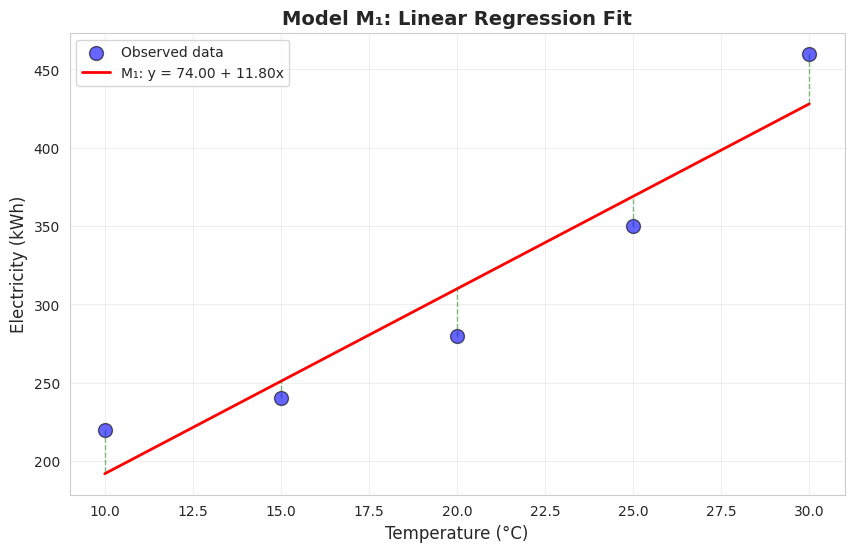

In [10]:
# Verify using numpy's polyfit
coeffs = np.polyfit(temperature, electricity, 1)
print(f"\nVerification using numpy.polyfit:")
print(f"β̂₁ = {coeffs[0]:.4f}")
print(f"β̂₀ = {coeffs[1]:.4f}")

# Calculate predictions and residuals
y_pred_m1 = beta_0_hat + beta_1_hat * temperature
residuals_m1 = electricity - y_pred_m1
rss_m1 = np.sum(residuals_m1**2)

print(f"\nResidual Sum of Squares (RSS): {rss_m1:.2f}")

# Visualize the fit
plt.figure(figsize=(10, 6))
plt.scatter(temperature, electricity, s=100, color='blue', alpha=0.6, 
            edgecolors='black', label='Observed data', zorder=3)
x_line = np.linspace(temperature.min(), temperature.max(), 100)
y_line = beta_0_hat + beta_1_hat * x_line
plt.plot(x_line, y_line, 'r-', linewidth=2, label=f'M₁: y = {beta_0_hat:.2f} + {beta_1_hat:.2f}x')

# Plot residuals
for i in range(len(temperature)):
    plt.plot([temperature[i], temperature[i]], [electricity[i], y_pred_m1[i]], 
             'g--', alpha=0.5, linewidth=1)

plt.xlabel('Temperature (°C)', fontsize=12)
plt.ylabel('Electricity (kWh)', fontsize=12)
plt.title('Model M₁: Linear Regression Fit', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

### Part (b): Likelihood Function for Model M₁

**Likelihood Function:**

For Model M₁: $y_i = \beta_0 + \beta_1 x_i + \varepsilon_i$ where $\varepsilon_i \sim N(0, \sigma^2)$

This means: $y_i | x_i, \beta_0, \beta_1, \sigma^2 \sim N(\beta_0 + \beta_1 x_i, \sigma^2)$

**For a single observation:**
$$p(y_i | x_i, \beta_0, \beta_1, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(y_i - \beta_0 - \beta_1 x_i)^2}{2\sigma^2}\right)$$

**For all n observations (assuming independence):**
$$L(\beta_0, \beta_1, \sigma^2 | D) = \prod_{i=1}^{n} p(y_i | x_i, \beta_0, \beta_1, \sigma^2)$$

$$L(\beta_0, \beta_1, \sigma^2 | D) = (2\pi\sigma^2)^{-n/2} \exp\left(-\frac{1}{2\sigma^2}\sum_{i=1}^{n}(y_i - \beta_0 - \beta_1 x_i)^2\right)$$

**Log-Likelihood:**
$$\log L = -\frac{n}{2}\log(2\pi) - \frac{n}{2}\log(\sigma^2) - \frac{1}{2\sigma^2}\sum_{i=1}^{n}(y_i - \beta_0 - \beta_1 x_i)^2$$

**Intuition:** The likelihood measures how probable the observed data is under specific parameter values. Higher likelihood = better fit.

In [11]:
def log_likelihood_m1(beta_0, beta_1, sigma_sq, x, y):
    """
    Calculate log-likelihood for Model M₁
    
    Parameters:
    -----------
    beta_0 : float - intercept
    beta_1 : float - slope
    sigma_sq : float - error variance
    x : array - predictor values
    y : array - response values
    
    Returns:
    --------
    log_lik : float - log-likelihood value
    """
    n = len(y)
    residuals = y - (beta_0 + beta_1 * x)
    rss = np.sum(residuals**2)
    
    log_lik = -n/2 * np.log(2*np.pi) - n/2 * np.log(sigma_sq) - rss/(2*sigma_sq)
    return log_lik

# Estimate sigma^2 from residuals
n = len(temperature)
sigma_sq_hat = rss_m1 / (n - 2)  # Divide by (n-2) for unbiased estimate

# Calculate log-likelihood at MLE estimates
log_lik = log_likelihood_m1(beta_0_hat, beta_1_hat, sigma_sq_hat, temperature, electricity)

print(f"Estimated σ² = {sigma_sq_hat:.4f}")
print(f"Log-Likelihood at MLE: {log_lik:.4f}")

Estimated σ² = 1063.3333
Log-Likelihood at MLE: -23.5176


### Part (c): Posterior Distribution for Model M₂

**Bayes' Theorem for Model M₂:**

$$p(\beta_0, \beta_1, \beta_2, \sigma^2 | D, M_2) = \frac{p(D | \beta_0, \beta_1, \beta_2, \sigma^2, M_2) \cdot p(\beta_0, \beta_1, \beta_2, \sigma^2 | M_2)}{p(D | M_2)}$$

**Components:**

1. **Posterior:** $p(\beta_0, \beta_1, \beta_2, \sigma^2 | D, M_2)$ - what we want

2. **Likelihood:** $p(D | \beta_0, \beta_1, \beta_2, \sigma^2, M_2) = \prod_{i=1}^{n} N(y_i | \beta_0 + \beta_1 x_i + \beta_2 x_i^2, \sigma^2)$

3. **Prior:** $p(\beta_0, \beta_1, \beta_2, \sigma^2 | M_2) = p(\beta_0)p(\beta_1)p(\beta_2)p(\sigma^2)$
   - $\beta_j \sim N(0, 10^2)$ for $j = 0, 1, 2$
   - $\sigma^2 \sim \text{Inverse-Gamma}(1, 1)$

4. **Marginal likelihood:** $p(D | M_2)$ - normalizing constant

**Intuition:** The posterior combines our prior beliefs with the evidence from data to give updated parameter estimates.

### Part (d): Why MCMC is Required

**Reason 1: Intractable Integral**

The marginal likelihood (denominator in Bayes' theorem) requires integration:

$$p(D | M_2) = \int \int \int \int p(D | \beta_0, \beta_1, \beta_2, \sigma^2, M_2) \cdot p(\beta_0, \beta_1, \beta_2, \sigma^2 | M_2) \, d\beta_0 \, d\beta_1 \, d\beta_2 \, d\sigma^2$$

This 4-dimensional integral has no closed-form solution.

**Reason 2: Non-Conjugate Priors**

The combination of:
- Normal likelihood
- Normal priors on β parameters
- Inverse-Gamma prior on σ²

does not result in a standard posterior distribution that we can sample from directly.

**MCMC Solution:**

Markov Chain Monte Carlo methods (like Gibbs sampling or Metropolis-Hastings) allow us to:
1. Generate samples from the posterior without computing the normalizing constant
2. Approximate posterior distributions and expectations using these samples
3. Handle complex, high-dimensional parameter spaces

**Intuition:** MCMC explores the parameter space by taking random walks that preferentially visit high-probability regions, building up a sample that represents the posterior distribution.

### Part (e): Bayes Factor and Model Comparison

**Given:**
- Marginal likelihood for M₁: $P(D | M_1) = 0.015$
- Marginal likelihood for M₂: $P(D | M_2) = 0.045$
- Prior model probabilities: $P(M_1) = P(M_2) = 0.5$

#### Part (e)(i): Bayes Factor

**Bayes Factor Definition:**

The Bayes Factor compares the evidence for two models:

$$BF_{21} = \frac{P(D | M_2)}{P(D | M_1)}$$

**Calculation:**
$$BF_{21} = \frac{0.045}{0.015} = 3$$

**Interpretation Scale (Kass & Raftery, 1995):**
- BF < 1: Evidence for M₁
- 1 < BF < 3: Weak evidence for M₂
- 3 < BF < 10: Moderate evidence for M₂
- 10 < BF < 100: Strong evidence for M₂
- BF > 100: Very strong evidence for M₂

**Result:** BF₂₁ = 3 indicates **moderate evidence** in favor of Model M₂ (quadratic model).

**Intuition:** The data is 3 times more likely under the quadratic model than the linear model.

In [12]:
# Given marginal likelihoods
P_D_given_M1 = 0.015
P_D_given_M2 = 0.045

# Prior model probabilities
P_M1 = 0.5
P_M2 = 0.5

# Calculate Bayes Factor
BF_21 = P_D_given_M2 / P_D_given_M1

print(f"{'='*60}")
print(f"BAYES FACTOR CALCULATION")
print(f"{'='*60}")
print(f"P(D|M₁) = {P_D_given_M1}")
print(f"P(D|M₂) = {P_D_given_M2}")
print(f"\nBayes Factor BF₂₁ = P(D|M₂) / P(D|M₁)")
print(f"BF₂₁ = {P_D_given_M2} / {P_D_given_M1} = {BF_21}")
print(f"\nInterpretation: Moderate evidence in favor of Model M₂")

BAYES FACTOR CALCULATION
P(D|M₁) = 0.015
P(D|M₂) = 0.045

Bayes Factor BF₂₁ = P(D|M₂) / P(D|M₁)
BF₂₁ = 0.045 / 0.015 = 3.0

Interpretation: Moderate evidence in favor of Model M₂


#### Part (e)(ii): Posterior Model Probabilities

**Bayes' Theorem for Model Selection:**

$$P(M_k | D) = \frac{P(D | M_k) \cdot P(M_k)}{P(D)}$$

where the marginal probability of data is:

$$P(D) = P(D | M_1) \cdot P(M_1) + P(D | M_2) \cdot P(M_2)$$

**Step 1: Calculate P(D)**
$$P(D) = (0.015)(0.5) + (0.045)(0.5)$$
$$P(D) = 0.0075 + 0.0225 = 0.03$$

**Step 2: Calculate P(M₁|D)**
$$P(M_1 | D) = \frac{P(D | M_1) \cdot P(M_1)}{P(D)} = \frac{(0.015)(0.5)}{0.03} = \frac{0.0075}{0.03} = 0.25$$

**Step 3: Calculate P(M₂|D)**
$$P(M_2 | D) = \frac{P(D | M_2) \cdot P(M_2)}{P(D)} = \frac{(0.045)(0.5)}{0.03} = \frac{0.0225}{0.03} = 0.75$$

**Verification:** $P(M_1 | D) + P(M_2 | D) = 0.25 + 0.75 = 1$ ✓

**Intuition:** After seeing the data, we're 75% confident that the quadratic model is correct, compared to 50% before seeing the data.

In [13]:
# Calculate marginal probability of data
P_D = P_D_given_M1 * P_M1 + P_D_given_M2 * P_M2

# Calculate posterior model probabilities
P_M1_given_D = (P_D_given_M1 * P_M1) / P_D
P_M2_given_D = (P_D_given_M2 * P_M2) / P_D

print(f"\n{'='*60}")
print(f"POSTERIOR MODEL PROBABILITIES")
print(f"{'='*60}")
print(f"P(D) = {P_D}")
print(f"\nP(M₁|D) = {P_M1_given_D:.4f} = {P_M1_given_D*100:.1f}%")
print(f"P(M₂|D) = {P_M2_given_D:.4f} = {P_M2_given_D*100:.1f}%")
print(f"\nVerification: P(M₁|D) + P(M₂|D) = {P_M1_given_D + P_M2_given_D}")


POSTERIOR MODEL PROBABILITIES
P(D) = 0.03

P(M₁|D) = 0.2500 = 25.0%
P(M₂|D) = 0.7500 = 75.0%

Verification: P(M₁|D) + P(M₂|D) = 1.0


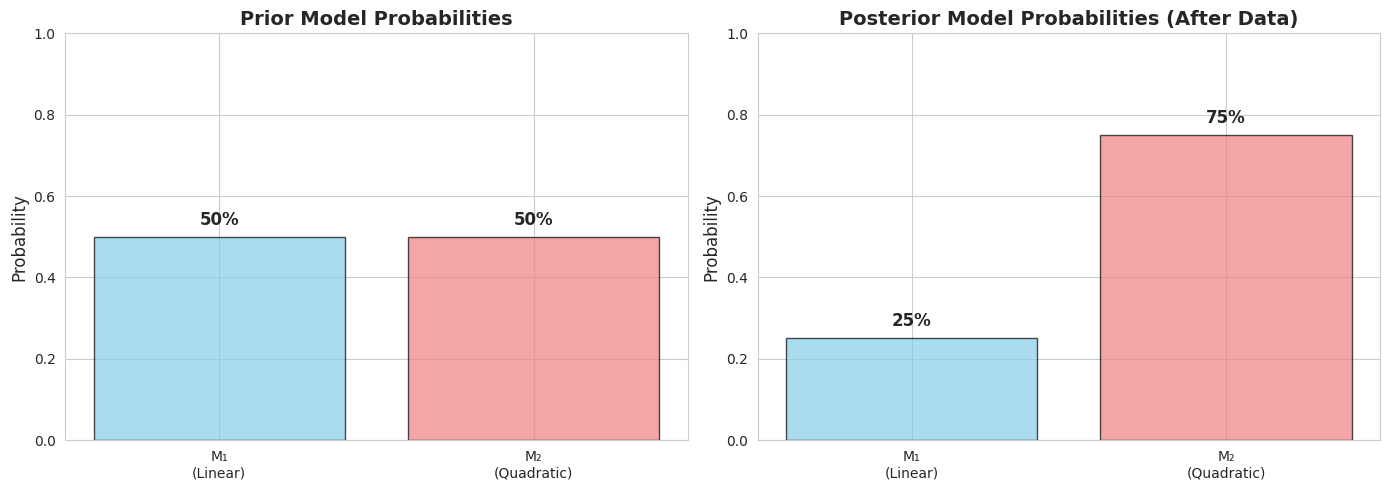

In [14]:
# Visualization: Prior vs Posterior Model Probabilities
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Prior probabilities
models = ['M₁\n(Linear)', 'M₂\n(Quadratic)']
prior_probs = [P_M1, P_M2]
axes[0].bar(models, prior_probs, color=['skyblue', 'lightcoral'], alpha=0.7, edgecolor='black')
axes[0].set_ylabel('Probability', fontsize=12)
axes[0].set_title('Prior Model Probabilities', fontsize=14, fontweight='bold')
axes[0].set_ylim([0, 1])
for i, v in enumerate(prior_probs):
    axes[0].text(i, v + 0.03, f'{v*100:.0f}%', ha='center', fontsize=12, fontweight='bold')

# Posterior probabilities
posterior_probs = [P_M1_given_D, P_M2_given_D]
axes[1].bar(models, posterior_probs, color=['skyblue', 'lightcoral'], alpha=0.7, edgecolor='black')
axes[1].set_ylabel('Probability', fontsize=12)
axes[1].set_title('Posterior Model Probabilities (After Data)', fontsize=14, fontweight='bold')
axes[1].set_ylim([0, 1])
for i, v in enumerate(posterior_probs):
    axes[1].text(i, v + 0.03, f'{v*100:.0f}%', ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

#### Part (e)(iii): Interpretation of Bayesian Model Comparison

**Key Findings:**

1. **Bayes Factor = 3:** Moderate evidence favoring the quadratic model
   - The data is 3 times more likely under M₂ than M₁
   - Not overwhelming, but meaningful support for including the quadratic term

2. **Posterior Probabilities:**
   - P(M₂|D) = 75%: Three-quarters probability that quadratic model is correct
   - P(M₁|D) = 25%: One-quarter probability that linear model is correct
   - The data shifted our belief from 50-50 to 75-25 in favor of M₂

3. **Practical Implications:**
   - The relationship between temperature and electricity consumption is likely **non-linear**
   - The quadratic term captures curvature in the relationship
   - This makes physical sense: electricity use may increase slowly at moderate temperatures but rapidly at extreme temperatures (heating/cooling needs)

4. **Model Uncertainty:**
   - We're not 100% certain which model is correct
   - 25% probability for M₁ suggests we shouldn't completely ignore the simpler model
   - This motivates **Bayesian Model Averaging** to account for model uncertainty

**Conclusion:** The quadratic model is preferred, but there's still meaningful uncertainty. We should use BMA to make predictions that account for both models.

### Part (f): Bayesian Model Averaging (BMA)

**Given Posterior Mean Estimates:**
- Model M₁: $\hat{\beta}_0 = 150$, $\hat{\beta}_1 = 8.5$
- Model M₂: $\hat{\beta}_0 = 120$, $\hat{\beta}_1 = 6.2$, $\hat{\beta}_2 = 0.45$

#### Part (f)(i): BMA Formula for Regression Coefficients

**Bayesian Model Averaging (BMA) Formula:**

For any parameter $\theta$ (e.g., regression coefficient), the BMA estimate is:

$$E[\theta | D] = \sum_{k=1}^{K} E[\theta | D, M_k] \cdot P(M_k | D)$$

**For our two models:**

$$E[\beta_j | D] = E[\beta_j | D, M_1] \cdot P(M_1 | D) + E[\beta_j | D, M_2] \cdot P(M_2 | D)$$

**Key Components:**
- $E[\beta_j | D, M_k]$: Posterior mean of $\beta_j$ under model $M_k$
- $P(M_k | D)$: Posterior probability of model $M_k$

**Special Cases:**
- For $\beta_0$ and $\beta_1$: Both models have these parameters
- For $\beta_2$: Only M₂ has this parameter, so we treat it as 0 in M₁

**Intuition:** BMA creates a weighted average of predictions from all models, where weights are the posterior model probabilities. This accounts for model uncertainty.

#### Part (f)(ii): Compute BMA Estimates

**For β₀ (Intercept):**

$$E[\beta_0 | D] = \hat{\beta}_0^{(M_1)} \cdot P(M_1 | D) + \hat{\beta}_0^{(M_2)} \cdot P(M_2 | D)$$
$$E[\beta_0 | D] = (150)(0.25) + (120)(0.75)$$
$$E[\beta_0 | D] = 37.5 + 90 = 127.5$$

**For β₁ (Linear coefficient):**

$$E[\beta_1 | D] = \hat{\beta}_1^{(M_1)} \cdot P(M_1 | D) + \hat{\beta}_1^{(M_2)} \cdot P(M_2 | D)$$
$$E[\beta_1 | D] = (8.5)(0.25) + (6.2)(0.75)$$
$$E[\beta_1 | D] = 2.125 + 4.65 = 6.775$$

**For β₂ (Quadratic coefficient):**

Note: M₁ doesn't have $\beta_2$, so we treat it as 0 in M₁

$$E[\beta_2 | D] = (0)(0.25) + (0.45)(0.75)$$
$$E[\beta_2 | D] = 0 + 0.3375 = 0.3375$$

**Intuition:** 
- $\beta_0$ and $\beta_1$ are weighted averages of both models' estimates
- $\beta_2$ is scaled down by P(M₂|D) = 0.75, reflecting uncertainty about whether the quadratic term is needed

In [15]:
# Given posterior mean estimates
# Model M1
beta_0_M1 = 150
beta_1_M1 = 8.5
beta_2_M1 = 0  # M1 doesn't have quadratic term

# Model M2
beta_0_M2 = 120
beta_1_M2 = 6.2
beta_2_M2 = 0.45

# Calculate BMA estimates
beta_0_BMA = beta_0_M1 * P_M1_given_D + beta_0_M2 * P_M2_given_D
beta_1_BMA = beta_1_M1 * P_M1_given_D + beta_1_M2 * P_M2_given_D
beta_2_BMA = beta_2_M1 * P_M1_given_D + beta_2_M2 * P_M2_given_D

print(f"{'='*60}")
print(f"BAYESIAN MODEL AVERAGING (BMA) ESTIMATES")
print(f"{'='*60}")
print(f"\nModel M₁ estimates:")
print(f"  β₀ = {beta_0_M1}")
print(f"  β₁ = {beta_1_M1}")
print(f"  β₂ = {beta_2_M1} (not in model)")

print(f"\nModel M₂ estimates:")
print(f"  β₀ = {beta_0_M2}")
print(f"  β₁ = {beta_1_M2}")
print(f"  β₂ = {beta_2_M2}")

print(f"\nPosterior model probabilities:")
print(f"  P(M₁|D) = {P_M1_given_D}")
print(f"  P(M₂|D) = {P_M2_given_D}")

print(f"\n{'='*60}")
print(f"BMA ESTIMATES:")
print(f"{'='*60}")
print(f"β₀ (BMA) = {beta_0_M1} × {P_M1_given_D} + {beta_0_M2} × {P_M2_given_D} = {beta_0_BMA}")
print(f"β₁ (BMA) = {beta_1_M1} × {P_M1_given_D} + {beta_1_M2} × {P_M2_given_D} = {beta_1_BMA}")
print(f"β₂ (BMA) = {beta_2_M1} × {P_M1_given_D} + {beta_2_M2} × {P_M2_given_D} = {beta_2_BMA}")

BAYESIAN MODEL AVERAGING (BMA) ESTIMATES

Model M₁ estimates:
  β₀ = 150
  β₁ = 8.5
  β₂ = 0 (not in model)

Model M₂ estimates:
  β₀ = 120
  β₁ = 6.2
  β₂ = 0.45

Posterior model probabilities:
  P(M₁|D) = 0.25
  P(M₂|D) = 0.75

BMA ESTIMATES:
β₀ (BMA) = 150 × 0.25 + 120 × 0.75 = 127.5
β₁ (BMA) = 8.5 × 0.25 + 6.2 × 0.75 = 6.775
β₂ (BMA) = 0 × 0.25 + 0.45 × 0.75 = 0.3375


#### Part (f)(iii): Final BMA Regression Equation

**BMA Regression Equation:**

$$\hat{y}_{BMA} = 127.5 + 6.775x + 0.3375x^2$$

**Alternative notation:**
$$E[y | x, D] = 127.5 + 6.775x + 0.3375x^2$$

**Interpretation:**

1. **Intercept (127.5):** Expected electricity consumption at 0°C
   - Weighted average between M₁'s 150 and M₂'s 120
   - Closer to M₂'s estimate due to higher posterior probability

2. **Linear term (6.775):** Rate of change in electricity per degree
   - Weighted average between M₁'s 8.5 and M₂'s 6.2
   - Accounts for uncertainty about the true linear effect

3. **Quadratic term (0.3375):** Acceleration in electricity use
   - Smaller than M₂'s 0.45 because we're only 75% sure it's needed
   - Captures non-linear relationship while hedging against model uncertainty

**Advantages of BMA:**
- Accounts for model uncertainty
- Better predictive performance than selecting a single model
- Provides more honest uncertainty quantification
- Automatically performs a form of regularization

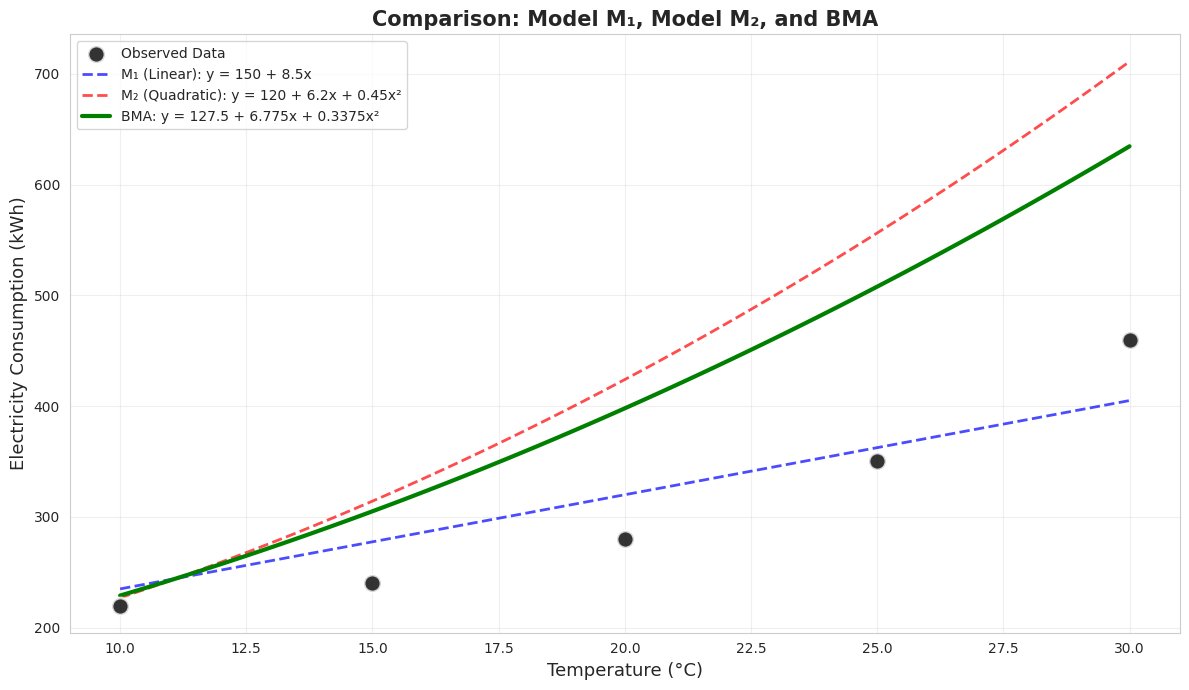

In [16]:
# Create predictions using all three approaches
x_pred = np.linspace(10, 30, 100)

# Model M1 predictions
y_pred_M1 = beta_0_M1 + beta_1_M1 * x_pred

# Model M2 predictions
y_pred_M2 = beta_0_M2 + beta_1_M2 * x_pred + beta_2_M2 * x_pred**2

# BMA predictions
y_pred_BMA = beta_0_BMA + beta_1_BMA * x_pred + beta_2_BMA * x_pred**2

# Visualization
plt.figure(figsize=(12, 7))
plt.scatter(temperature, electricity, s=150, color='black', alpha=0.8, 
            edgecolors='white', linewidth=2, label='Observed Data', zorder=5)

plt.plot(x_pred, y_pred_M1, 'b--', linewidth=2, alpha=0.7, 
         label=f'M₁ (Linear): y = {beta_0_M1} + {beta_1_M1}x')
plt.plot(x_pred, y_pred_M2, 'r--', linewidth=2, alpha=0.7, 
         label=f'M₂ (Quadratic): y = {beta_0_M2} + {beta_1_M2}x + {beta_2_M2}x²')
plt.plot(x_pred, y_pred_BMA, 'g-', linewidth=3, 
         label=f'BMA: y = {beta_0_BMA} + {beta_1_BMA}x + {beta_2_BMA}x²')

plt.xlabel('Temperature (°C)', fontsize=13)
plt.ylabel('Electricity Consumption (kWh)', fontsize=13)
plt.title('Comparison: Model M₁, Model M₂, and BMA', fontsize=15, fontweight='bold')
plt.legend(fontsize=10, loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [17]:
# Make predictions at observed temperatures
print(f"\n{'='*70}")
print(f"PREDICTIONS AT OBSERVED TEMPERATURES")
print(f"{'='*70}")
print(f"{'Temp (°C)':<12} {'Observed':<12} {'M₁':<12} {'M₂':<12} {'BMA':<12}")
print(f"{'-'*70}")

for i, (x, y_obs) in enumerate(zip(temperature, electricity)):
    y_m1 = beta_0_M1 + beta_1_M1 * x
    y_m2 = beta_0_M2 + beta_1_M2 * x + beta_2_M2 * x**2
    y_bma = beta_0_BMA + beta_1_BMA * x + beta_2_BMA * x**2
    
    print(f"{x:<12} {y_obs:<12} {y_m1:<12.2f} {y_m2:<12.2f} {y_bma:<12.2f}")

# Calculate residuals and errors
y_m1_pred = beta_0_M1 + beta_1_M1 * temperature
y_m2_pred = beta_0_M2 + beta_1_M2 * temperature + beta_2_M2 * temperature**2
y_bma_pred = beta_0_BMA + beta_1_BMA * temperature + beta_2_BMA * temperature**2

mse_m1 = np.mean((electricity - y_m1_pred)**2)
mse_m2 = np.mean((electricity - y_m2_pred)**2)
mse_bma = np.mean((electricity - y_bma_pred)**2)

print(f"\n{'='*70}")
print(f"MEAN SQUARED ERROR (MSE)")
print(f"{'='*70}")
print(f"MSE (M₁):  {mse_m1:.2f}")
print(f"MSE (M₂):  {mse_m2:.2f}")
print(f"MSE (BMA): {mse_bma:.2f}")
print(f"\nBMA provides a balanced prediction that accounts for model uncertainty.")


PREDICTIONS AT OBSERVED TEMPERATURES
Temp (°C)    Observed     M₁           M₂           BMA         
----------------------------------------------------------------------
10           220          235.00       227.00       229.00      
15           240          277.50       314.25       305.06      
20           280          320.00       424.00       398.00      
25           350          362.50       556.25       507.81      
30           460          405.00       711.00       634.50      

MEAN SQUARED ERROR (MSE)
MSE (M₁):  1282.50
MSE (M₂):  26367.62
MSE (BMA): 14718.63

BMA provides a balanced prediction that accounts for model uncertainty.


## Summary and Key Takeaways

### Question 1: Facial Recognition System
- **Prior:** Only 0.5% of travelers are on watchlist
- **Posterior:** If flagged, only 13.73% chance of being on watchlist
- **Lesson:** Base rate fallacy - rare events lead to many false positives
- **Policy:** Use additional screening, not immediate detention

### Question 2: Bayesian Regression and Model Comparison
- **OLS:** Estimated linear model coefficients
- **Likelihood:** Probability of data given parameters
- **MCMC:** Required for complex posterior distributions
- **Bayes Factor:** BF = 3 shows moderate evidence for quadratic model
- **Model Probabilities:** 75% for M₂, 25% for M₁
- **BMA:** Accounts for model uncertainty by averaging predictions

### Core Bayesian Concepts Demonstrated
1. **Bayes' Theorem:** Updating beliefs with data
2. **Prior → Posterior:** How evidence changes our beliefs
3. **Model Comparison:** Using Bayes factors and posterior probabilities
4. **Model Averaging:** Hedging against model uncertainty
5. **Practical Decision Making:** Translating probabilities into actions